<a href="https://colab.research.google.com/github/sravyamullapudi26/fmml-lab-1/blob/main/FMML_Module_9_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

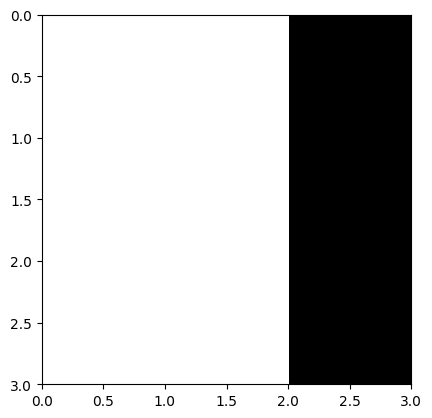

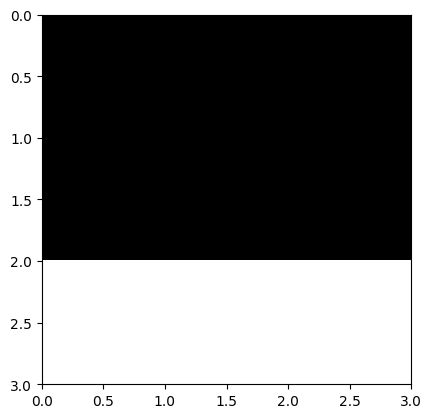

In [10]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [11]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [12]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [13]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [16]:
import cv2
import numpy as np

def apply_conv(image, filter, padding=0, stride=1):
    """
    Apply convolution operation on the image using the provided filter.

    Args:
    - image: Input image (2D numpy array).
    - filter: Convolution filter (2D numpy array).
    - padding: Amount of padding around the image (default: 0).
    - stride: Stride value (default: 1).

    Returns:
    - out: Convolved image (2D numpy array).
    """
    # Get dimensions of the input image and the filter
    image_height, image_width = image.shape
    filter_height, filter_width = filter.shape

    # Calculate the dimensions of the output image after convolution
    out_height = (image_height + 2 * padding - filter_height) // stride + 1
    out_width = (image_width + 2 * padding - filter_width) // stride + 1

    # Initialize the output image
    out = np.zeros((out_height, out_width))

    # Apply convolution operation
    for i in range(0, out_height):
        for j in range(0, out_width):
            # Apply the filter to the current region of the image
            image_patch = image[i * stride:i * stride + filter_height, j * stride:j * stride + filter_width]
            out[i, j] = np.sum(image_patch * filter)

    return out

# Load the image
image_path = '/content/grid1 (1).jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print(f"Failed to load image from path: {image_path}")
else:
    # Define the filters
    filter1 = np.array([[-1,-1,-1],
                        [ 0, 0, 0],
                        [ 1, 1, 1]])

    filter2 = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])

    # Apply convolution with the first filter
    out1 = apply_conv(image, filter1, padding=0, stride=1)

    # Apply convolution with the second filter
    out2 = apply_conv(image, filter2, padding=0, stride=1)

    # Display the results (you can use cv2.imshow() or matplotlib to display images)
    cv2.imshow('Filtered Image 1', out1)
    cv2.imshow('Filtered Image 2', out2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Failed to load image from path: /content/grid1 (1).jpg


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [19]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [20]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:01<00:00, 96249609.84it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [21]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [22]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [23]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [24]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [25]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [26]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [27]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [ ]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0130, Accuracy: 38.5420


In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [ ]:
# Accuracy on test data after training
test_model(model, testloader)

## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


Convolutional Neural Networks (CNNs) are generally preferred over Artificial Neural Networks (ANNs) for image classification tasks due to several reasons:

1. **Hierarchical Feature Learning**: CNNs are specifically designed to automatically learn hierarchical representations of features from raw pixel values. They use convolutional layers to extract local features such as edges, textures, and patterns, and then aggregate them in subsequent layers to capture higher-level representations, which is crucial for understanding images.

2. **Parameter Sharing**: CNNs utilize parameter sharing in their convolutional layers, which helps in reducing the number of parameters compared to fully connected layers in ANNs. This parameter sharing property allows CNNs to learn translation-invariant features, making them more efficient for processing images.

3. **Spatial Hierarchies**: CNNs are well-suited for capturing spatial hierarchies present in images. The convolutional layers learn spatial relationships between pixels or regions, enabling them to detect features regardless of their location within the image. This spatial hierarchy is important for tasks like object detection and localization.

4. **Local Receptive Fields**: CNNs employ local receptive fields in their convolutional layers, which enables them to focus on small, local regions of the input image at a time. This allows CNNs to efficiently capture local patterns and structures while preserving spatial information, which is crucial for understanding images.

5. **Parameter Efficiency**: CNNs are more parameter-efficient compared to ANNs when dealing with large images. By sharing parameters across different regions of the input image, CNNs require fewer parameters to achieve similar or better performance compared to ANNs, making them more scalable for processing high-resolution images.

6. **Transfer Learning**: CNNs trained on large datasets like ImageNet can be effectively used as feature extractors for various image classification tasks through transfer learning. By fine-tuning pre-trained CNNs on specific datasets, one can achieve good performance even with limited labeled data, which is beneficial in scenarios where labeled data is scarce.

Overall, the architecture and design principles of CNNs make them highly suitable for image classification tasks, outperforming traditional ANNs in terms of performance, efficiency, and scalability.

To improve the performance of a Convolutional Neural Network (CNN) for image classification, we can tune various hyperparameters such as the number of epochs, optimizer, learning rate, batch size, etc. Here's an example of how we can perform hyperparameter tuning using Python's Keras library:

```python
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN architecture
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model with the specified optimizer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters for tuning
epochs = [10, 20, 30]
optimizers = ['adam', 'sgd']
learning_rates = [0.001, 0.01, 0.1]

best_accuracy = 0
best_hyperparameters = {}

# Hyperparameter tuning loop
for epoch in epochs:
    for optimizer in optimizers:
        for lr in learning_rates:
            # Create the model with current hyperparameters
            model = create_model(optimizer)
            
            # Train the model
            history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_test, y_test), batch_size=32, verbose=0)

            # Evaluate the model
            test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
            
            # Print the results
            print(f'Epochs: {epoch}, Optimizer: {optimizer}, Learning Rate: {lr}, Test Accuracy: {test_accuracy:.4f}')

            # Update best accuracy and hyperparameters if current model performs better
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_hyperparameters = {'epochs': epoch, 'optimizer': optimizer, 'learning_rate': lr}

print(f"\nBest Test Accuracy: {best_accuracy:.4f}")
print("Best Hyperparameters:", best_hyperparameters)
```

In this code:

- We define a CNN architecture using Keras Sequential API.
- We specify hyperparameters to tune such as the number of epochs, optimizer, and learning rate.
- We use nested loops to iterate through all combinations of hyperparameters.
- For each combination, we create a CNN model, train it on the training data, and evaluate its performance on the test data.
- We print the test accuracy for each combination of hyperparameters.
- Finally, we print the best test accuracy achieved and the corresponding best hyperparameters.

You can run this code to perform hyperparameter tuning and find the combination of hyperparameters that results in the highest test accuracy. Adjust the hyperparameter ranges and search space as needed to further optimize the performance.